# TeleCommunication Churn Model Using MLPs


## 1.  Import Packages and loading Data




In [0]:
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#imports
import numpy as np
from glob import glob
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from keras import optimizers
import matplotlib 
matplotlib.use('agg')
import matplotlib.pyplot as plt                        
%matplotlib inline
import os
import datetime
import time
from PIL import ImageFile
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
ImageFile.LOAD_TRUNCATED_IMAGES = True
import warnings
warnings.filterwarnings("ignore")
import pylab as pl
import pandas as pd 
import seaborn as sns


Using TensorFlow backend.


In [0]:
data = pd.read_csv("/content/gdrive/My Drive/churn model/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.   Preporcess Data



In [0]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
#data Manipulation


#Dropping null values from total charges column
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.dropna(inplace = True)
#Dropping customerID
data.drop(labels=['customerID'],axis=1,inplace=True)
data.reset_index()
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

data[replace_cols]  = data[replace_cols].replace({'No internet service' : 'No'})

columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling', 'Churn']
data[columns_to_convert]  = data[columns_to_convert].replace({'No' : 0,'Yes':1})
data['MultipleLines'] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data['MultipleLines']]
data['gender']= data['gender'].replace({'Female':1, 'Male':0})
data.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [0]:
data = pd.get_dummies(data=data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [0]:
data.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity                            -0.171270
TechSupport                               -0.164716
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
gender                                     0.008545
PhoneService                               0.011691
MultipleLines                              0.036148
StreamingMovies                            0.060860
StreamingTV 

## 3.   Training and Validation Data Sets




In [0]:
#assign Class_att column as y attribute
y = data.Churn.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)
x=new_data.values

In [0]:
x=preprocessing.StandardScaler().fit_transform(x)


In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

## 4 Model Parameters

In [0]:
#model parameters
input_size=X_train.shape[1]
output_classes=2
hidden_layers=3
hidden_layers_size=[4096,2048,1024,256,128]
activation=['tanh','tanh','tanh','tanh','tanh']
dropout=[0.0,0.0,0.0,0.0,0.0]
retrain=True
learning_rate=0.00000005
learning_rate=0.00001
# enter model path and file name where you want to load or save your new model
model_path="/content/gdrive/My Drive/churn model/churnmodel_more_data_tanh.h5"

## 5 Model Functions

### 5.1 Create MLP

In [0]:
def create_MLP(input_s,output_s,hidden_layers,hidden_size,activation,dropout,learning_rate):
    ml=[]
    layers=[input_s]+hidden_size+[output_s]
    dropout=[0.0]+dropout+[0.0]
    activation=['']+activation+['']
    ml.append(Dense(layers[1],input_shape=[input_s],activation=eval('tf.nn.'+activation[1])))
    for i in range(2,len(layers)-1):
        #print('tf.nn.'+activation[i])
        ml.append(Dense(layers[i],activation=eval('tf.nn.'+activation[i])))
    ml.append(Dense(layers[-1],activation=tf.nn.softmax))
    print(ml)
    model=tf.keras.models.Sequential(ml)
    adam= optimizers.Adam(lr=learning_rate)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

### 5.2 Testing Model

In [0]:
def test_model(model,features,labels):
    test_loss,test_accuracy=model.evaluate(features,labels)
    return test_accuracy,test_loss

### 5.3 Testing  Model and Priniting Classification Report, Accuracy Score, and Confusion Matrix

In [0]:

def test_report_model(model,features,labels):
    test_loss,test_accuracy=model.evaluate(features,labels)
    prob=model.predict(features)
    print(prob.shape)
    print(prob[0])
    predictions=np.argmax(prob,axis=1)
    print(predictions.shape)
    print(classification_report(labels, predictions,digits=5))
    print ("Accuracy Score: ",accuracy_score(labels,predictions))
    conf_matrix=confusion_matrix(labels,predictions)
    #print ("Confusion Matrix: ",conf_matrix)
    import seaborn as sns
    f, ax = plt.subplots(figsize = (5,5))
    sns.heatmap(conf_matrix, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
    plt.xlabel("y_predicted")
    plt.ylabel("y_true")
    plt.title("Confusion Matrix")
    plt.show()
    return test_accuracy

### 5.4 Training And Saving Model

In [0]:
def train_model(model,epochs,features_train,labels_train,features_valid,labels_valid,valid_acc_max,model_path_name):
    for i in range(epochs):
      history=model.fit(features_train,labels_train,1)
      _,valid_acc=model.evaluate(features_valid,labels_valid)
      #valid_acc=history['acc'][0]
      if valid_acc>valid_acc_max:
        print(f"*************New Model Saved with correct predictions of:{valid_acc:.5f}***************")
        model.save(model_path_name)
        valid_acc_max= valid_acc
    return model,valid_acc_max

## 6. Model Creation 

In [0]:
# Model instainstiation
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if(retrain):
    model = tf.keras.models.load_model(model_path)
    import tensorflow.keras.backend as K
    # To get learning rate
    print(K.get_value(model.optimizer.lr))
    # To set learning rate
    K.set_value(model.optimizer.lr, learning_rate)
    
else:
    model=create_MLP(input_size,output_classes,hidden_layers,hidden_layers_size,activation,dropout,learning_rate)

Instructions for updating:
Colocations handled automatically by placer.
0.001


In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              110592    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 10,894,978
Trainable params: 10,894,978
Non-trainable params: 0
________________________________________________________________

## 7. Training Model

In [0]:
# test model intially over validation set
valid_acc_max,valid_loss,=test_model(model,X_valid,y_valid)
print(valid_acc_max,valid_loss)

1407/1407 [==============================] - 1s 602us/sample - loss: 0.4615 - acc: 0.7790
0.7789623 0.4614730967260373


In [0]:
#train model
model,valid_acc_max = train_model(model,5, X_train, y_train, X_valid, y_valid, valid_acc_max,model_path) 
print(valid_acc_max)

1407/1407 [==============================] - 0s 102us/sample - loss: 0.4615 - acc: 0.7790
*************New Model Saved with correct predictions of:0.77896***************
1407/1407 [==============================] - 0s 96us/sample - loss: 0.4654 - acc: 0.7733
0.7789623


## 8. Testing Model

1407/1407 [==============================] - 0s 120us/sample - loss: 0.4615 - acc: 0.7790
(1407, 2)
[0.95234567 0.04765433]
(1407,)
              precision    recall  f1-score   support

           0    0.82004   0.89545   0.85609      1033
           1    0.61290   0.45722   0.52374       374

   micro avg    0.77896   0.77896   0.77896      1407
   macro avg    0.71647   0.67633   0.68991      1407
weighted avg    0.76498   0.77896   0.76774      1407

Accuracy Score:  0.7789623312011372


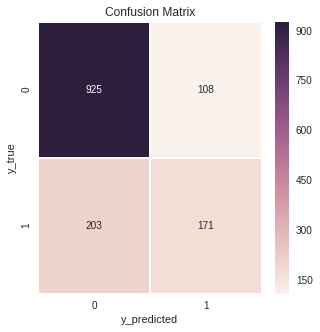

0.7789623

In [0]:
test_report_model(model,X_valid,y_valid)

## 9. Repeating Whole Process After Applying PCA on Data Set

In [0]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2
from sklearn.decomposition import PCA

In [0]:
n_components=10
pca = PCA(n_components=10)
x_new=pca.fit_transform(x)

In [0]:
x_new.shape

(7032, 10)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(x_new, y, test_size=0.2, random_state=42)

In [0]:
X_train.shape

(5625, 10)

In [0]:
#model parameters
input_size=X_train.shape[1]
output_classes=2
hidden_layers=3
hidden_layers_size=[4096,2048,1024,256,128]
activation=['tanh','tanh','tanh','tanh','tanh']
dropout=[0.0,0.0,0.0,0.0,0.0]
retrain=True
#learning_rate=0.00000005
learning_rate=0.00001
# enter model path and file name where you want to load or save your new model
model_path=f"/content/gdrive/My Drive/churn model/churnmodel_more_data_tanh_PCA_{n_components}.h5"

In [0]:
# Model instainstiation
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if(retrain):
    model = tf.keras.models.load_model(model_path)
    import tensorflow.keras.backend as K
    # To get learning rate
    print(K.get_value(model.optimizer.lr))
    # To set learning rate
    K.set_value(model.optimizer.lr, learning_rate)
    
else:
    model=create_MLP(input_size,output_classes,hidden_layers,hidden_layers_size,activation,dropout,learning_rate)

1e-05


In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4096)              45056     
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 258       
Total params: 10,829,442
Trainable params: 10,829,442
Non-trainable params: 0
________________________________________________________________

In [0]:
# test model intially over validation set
valid_acc_max,valid_loss,=test_model(model,X_valid,y_valid)
print(valid_acc_max,valid_loss)

1407/1407 [==============================] - 0s 161us/sample - loss: 0.4543 - acc: 0.7747
0.77469796 0.4543226630279335


In [0]:
#train model
model,valid_acc_max = train_model(model,5, X_train, y_train, X_valid, y_valid, valid_acc_max,model_path) 
print(valid_acc_max)

1407/1407 [==============================] - 0s 96us/sample - loss: 0.4535 - acc: 0.7761
*************New Model Saved with correct predictions of:0.77612***************
0.7761194


1407/1407 [==============================] - 0s 102us/sample - loss: 0.4535 - acc: 0.7761
(1407, 2)
[0.9787355 0.0212645]
(1407,)
              precision    recall  f1-score   support

           0    0.82577   0.88093   0.85246      1033
           1    0.59672   0.48663   0.53608       374

   micro avg    0.77612   0.77612   0.77612      1407
   macro avg    0.71125   0.68378   0.69427      1407
weighted avg    0.76489   0.77612   0.76836      1407

Accuracy Score:  0.7761194029850746


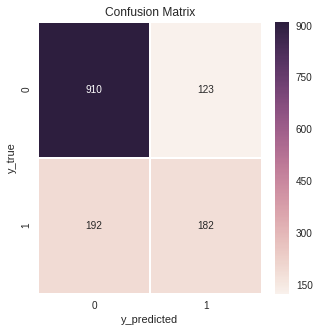

0.7761194

In [0]:
test_report_model(model,X_valid,y_valid)